In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import string
from sklearn.metrics import classification_report


In [2]:
data = pd.read_csv("email_dataset_clear.csv")
data.dropna(inplace=True)

In [3]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5572 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


In [5]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [6]:
data['Spam'] = data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i dont think he goes to usf he lives aroun...,0


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.Message,data.Spam,test_size=0.2,random_state=42)

# X_train: Dữ liệu đầu vào cho tập huấn luyện (80% dữ liệu từ data.Message).
# X_test: Dữ liệu đầu vào cho tập kiểm tra (20% dữ liệu từ data.Message).
# y_train: Nhãn tương ứng với X_train (80% từ data.Spam).
# y_test: Nhãn tương ứng với X_test (20% từ data.Spam).

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB


In [11]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer',CountVectorizer()),           # Chuyển văn bản thành vector
     ('nb',MultinomialNB())                   # Áp dụng Naive Bayes
])


In [12]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [13]:
# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Tính toán độ chính xác và in ra báo cáo phân loại
accuracy1 = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy1)
print("classification Report: ")
print(classification_report(y_test,y_pred))

Accuracy:  0.9829596412556054
classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.97      0.91      0.94       166

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_counts,y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn_classifier.predict(X_test_counts)
accuracy2 = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy2)
print("classification Report: ")
print(classification_report(y_test,y_pred))

Accuracy:  0.9174887892376682
classification Report: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       949
           1       1.00      0.45      0.62       166

    accuracy                           0.92      1115
   macro avg       0.96      0.72      0.79      1115
weighted avg       0.92      0.92      0.90      1115



Support Vector Machines (SVM)


In [17]:
from sklearn.svm import SVC


In [18]:
svm_classifier = SVC()
svm_classifier.fit(X_train_counts,y_train)

SVC()

In [19]:
y_pred = svm_classifier.predict(X_test_counts)
accuracy3 = accuracy_score(y_test,y_pred)
print("SVM Accuracy: ",accuracy3)
print("SVM Classification Report: ")
print(classification_report(y_test,y_pred))


SVM Accuracy:  0.9838565022421525
SVM Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       1.00      0.89      0.94       166

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_counts,y_train)

LogisticRegression()

In [22]:
y_pred = logistic_regression.predict(X_test_counts)
accuracy4 = accuracy_score(y_test,y_pred)

print("Logistic Regression Accuracy: ",accuracy4)
print("Logistic Regression Classification Report:")
print(classification_report(y_test,y_pred))

Logistic Regression Accuracy:  0.9865470852017937
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       1.00      0.91      0.95       166

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Random Forest


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_counts,y_train)

RandomForestClassifier()

In [25]:
y_pred = random_forest.predict(X_test_counts)
accuracy5 = accuracy_score(y_test,y_pred)
print("Random Forest Accuracy: ",accuracy5)
print("Random Forest Classifier Report:")
print(classification_report(y_test,y_pred))


Random Forest Accuracy:  0.9748878923766816
Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       949
           1       1.00      0.83      0.91       166

    accuracy                           0.97      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.97      0.97      1115



Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_counts, y_train)


GradientBoostingClassifier()

In [28]:
y_pred = gradient_boosting.predict(X_test_counts)
accuracy6 = accuracy_score(y_test,y_pred)
print("Gradient Boosting accuracy: ",accuracy6)
print("Gradient Boosting Classifier Report:")
print(classification_report(y_test,y_pred))

Gradient Boosting accuracy:  0.9668161434977578
Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       949
           1       0.97      0.80      0.88       166

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



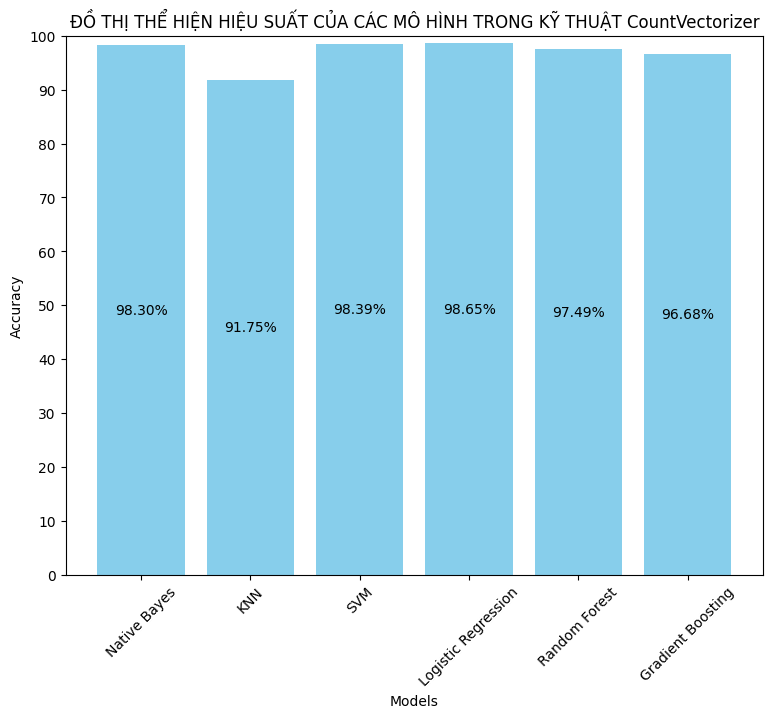

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Các độ chính xác của từng mô hình
accuracies = [accuracy1*100,accuracy2*100,accuracy3*100,accuracy4*100,accuracy5*100,accuracy6*100]

# Tên các mô hình
models = ["Native Bayes", "KNN","SVM", "Logistic Regression", "Random Forest", "Gradient Boosting"]

plt.figure(figsize=(9,7))
bars = plt.bar(models,accuracies,color="skyblue")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("ĐỒ THỊ THỂ HIỆN HIỆU SUẤT CỦA CÁC MÔ HÌNH TRONG KỸ THUẬT CountVectorizer")
plt.ylim(0,100)
plt.yticks(np.arange(0,105,10))
plt.xticks(rotation = 45)

for bar,accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'{accuracy:.2f}%', 
             ha='center', va='center')
plt.show()